In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

## Changing color scale

In [5]:
img = cv2.imread('images\\dp.jpg', cv2.IMREAD_COLOR)

In [12]:
img.shape

(428, 590, 3)

In [7]:
grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [13]:
grey_img

array([[115, 114, 115, ...,  99,  97,  95],
       [114, 114, 115, ...,  96,  98,  96],
       [115, 115, 116, ...,  97,  96,  97],
       ...,
       [ 66,  67,  66, ...,  64,  63,  64],
       [ 65,  62,  64, ...,  64,  64,  64],
       [ 64,  63,  63, ...,  65,  64,  63]], dtype=uint8)

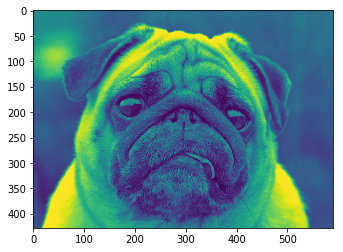

In [6]:
# cv2.imshow('GrayScale_Image', grey_img)
plt.imshow(grey_img)

In [7]:
cv2.imwrite("Gray_Scale_image.png", grey_img)

True

In [23]:
cv2.waitKey()

-1

## Rotation

In [2]:
img = cv2.imread('images\\dp.jpg')

In [15]:
num_rows, num_cols = img.shape[:2]

In [16]:
img.shape[:2]

(428, 590)

In [17]:
rot_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 0.7)

In [19]:
rot_matrix

array([[  0.60621778,   0.35      ,  41.26575412],
       [ -0.35      ,   0.60621778, 187.51939451]])

In [20]:
img_rotation = cv2.warpAffine(img, rot_matrix, (num_cols, num_rows))

In [21]:
# cv2.imshow('Rotated Image', img_rotation)

In [22]:
# cv2.waitKey(0)
cv2.imwrite('01.png',img_rotation) #saves the picture

True

## Image Scaling

In [23]:
img = cv2.imread('images\\dp.jpg')

In [18]:
img_scaled = cv2.resize(img, None, fx=20, fy=20, interpolation=cv2.INTER_CUBIC)

In [19]:
cv2.imwrite('Cubic_Interpolation2.png',img_scaled)

True

## Affine Transformation

In [24]:
import numpy as np

In [25]:
img = cv2.imread('images\\dp.jpg')

In [26]:
img.shape

(428, 590, 3)

In [35]:
num_rows, num_cols = img.shape[:2]

In [27]:
src_points = np.float32([[0,0], [num_cols-1,0], [0, num_rows-1], [num_cols-1, num_rows-1]])

In [28]:
src_points

array([[  0.,   0.],
       [589.,   0.],
       [  0., 427.],
       [589., 427.]], dtype=float32)

In [29]:
dst_points = np.float32([[0,0], [num_cols-1,0], [int(0.3*num_cols), num_rows-1], [int(0.6*num_cols), num_rows-1]])

In [31]:
dst_points

array([[  0.,   0.],
       [589.,   0.],
       [177., 427.],
       [354., 427.]], dtype=float32)

In [36]:
project_matrix = cv2.getPerspectiveTransform(dst_points, src_points)

In [37]:
project_matrix

array([[ 1.        , -0.41451991,  0.        ],
       [ 0.        ,  0.30050934,  0.        ],
       [-0.        , -0.00163815,  1.        ]])

In [38]:
img_out = cv2.warpPerspective(img, project_matrix, (num_cols, num_rows))

In [39]:
cv2.imwrite('Projective_Transform_R.png',img_out)

True

## 2nd Part

In [65]:
dst_points = np.float32([[0,int(0.3*num_rows-1)], [num_cols-1,0], [0, int(0.6*num_rows-1)], [num_cols-1,num_rows-1]])

In [66]:
dst_points

array([[  0., 127.],
       [589.,   0.],
       [  0., 255.],
       [589., 427.]], dtype=float32)

In [67]:
project_matrix = cv2.getPerspectiveTransform(src_points, dst_points)

In [68]:
img_out = cv2.warpPerspective(img, project_matrix, (num_cols, num_rows))

In [69]:
cv2.imwrite('Projective_Transform2.png',img_out)

True